In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import cv2

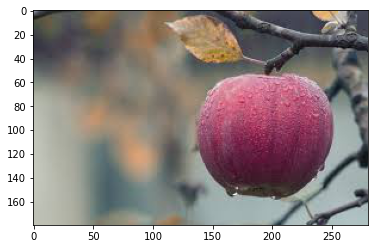

In [15]:
pImg = r'C:\Users\Gadhiya\OneDrive\Desktop\ComputerVision\colorImg1.jpg'
pImg = plt.imread(pImg)
plt.imshow(pImg)

In [16]:
imGray = cv2.cvtColor(pImg, cv2.COLOR_RGB2GRAY)

---
### 181 - Canny Edge Detector OpenCV
---

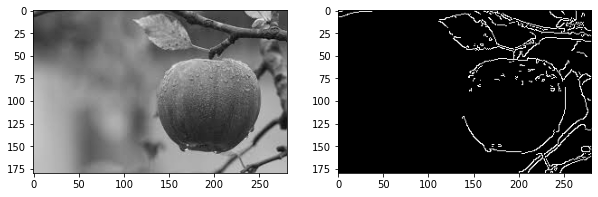

In [22]:
E = cv2.Canny(imGray, 150, 250)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(imGray, cmap='gray')
ax2.imshow(E, cmap='gray')

---
### 185 - Gaussian Filter to Mask Computation
---

In [29]:
x = 1
y = 1
sigma = 1
v = (1/(2*np.pi*(sigma**2)))*np.exp(-((x**2+y**2)/2*(sigma**2)))
v

0.05854983152431917

---
### 187 - Gaussian Filter Implementation
---

In [31]:
def getGaussianFilter(s, sigma):
    maxX = maxY = s//2
    minX = minY = -maxX
    G = np.zeros((s,s))
    for x in range(minX,maxX+1):
        for y in range(minY,maxY+1):
            G[x-minX,y-minY] = (1/(2*np.pi*(sigma**2)))*np.exp(-((x**2+y**2)/2*(sigma**2)))
    return G

In [58]:
G = getGaussianFilter(5, 1)
G.sum()

0.9818147610543744

In [63]:
Gx = cv2.getGaussianKernel(5,1)
Gx.sum()

1.0

---
### 190 - Gaussian Filter Smoothing
---

(-0.5, 280.5, 179.5, -0.5)

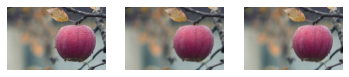

In [71]:
imgS = cv2.filter2D(pImg, -1, G)
imgS2 = cv2.filter2D(pImg, -1, Gx)
plt.subplot(131)
plt.imshow(pImg)
plt.axis('off')
plt.subplot(132)
plt.imshow(imgS)
plt.axis('off')
plt.subplot(133)
plt.imshow(imgS2)
plt.axis('off')

---
### 194 - Image Gradients Implementation
---

In [101]:
maskX = np.zeros((2,1))
maskX[0],maskX[1] = -1,1
imgS = imgS[:,:,0]
imgS = np.float64(imgS)

In [102]:
Ix = cv2.filter2D(imgS,-1,maskX)      # x-derivative shows changes in vertical direction

In [103]:
maskY = maskX.T
Iy = cv2.filter2D(imgS,-1,maskY)      # y-derivative shows changes in horizontal direction

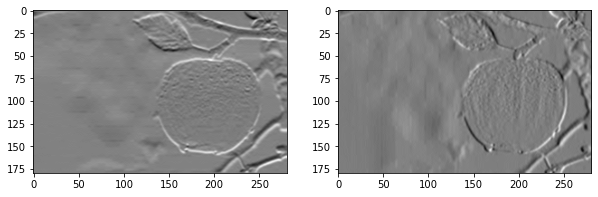

In [105]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(Ix, cmap='gray')
ax2.imshow(Iy, cmap='gray')

In [95]:
gradientVector = np.array([Ix[5,3],Iy[5,3]])
gradientVector

array([[0, 0, 0],
       [0, 0, 0]], dtype=uint8)

---
### 198 - Derivative of Guassian Implementation
---

In [106]:
def Gx(s, sigma):
    maxX = maxY = s//2
    minX = minY = -maxX
    Gx = np.zeros((s,s))
    for x in range(minX,maxX+1):
        for y in range(minY,maxY+1):
            Gx[x-minX,y-minY] = (-x/(2*np.pi*(sigma**4)))*np.exp(-((x**2+y**2)/2*(sigma**2)))
    return Gx

In [107]:
def Gy(s, sigma):
    maxX = maxY = s//2
    minX = minY = -maxX
    Gy = np.zeros((s,s))
    for x in range(minX,maxX+1):
        for y in range(minY,maxY+1):
            Gy[x-minX,y-minY] = (-y/(2*np.pi*(sigma**4)))*np.exp(-((x**2+y**2)/2*(sigma**2)))
    return Gy

In [108]:
gx = Gx(3,0.5)
gy = Gy(3,0.5)
print(gx)
print(gy)       # here we can observe that gy is transpose of gx

[[ 1.98319991  2.24725991  1.98319991]
 [ 0.          0.          0.        ]
 [-1.98319991 -2.24725991 -1.98319991]]
[[ 1.98319991  0.         -1.98319991]
 [ 2.24725991  0.         -2.24725991]
 [ 1.98319991  0.         -1.98319991]]


---
### 199 - Applying DOG Filters
---

In [111]:
imGray = np.float64(imGray)

In [112]:
Ix = cv2.filter2D(imGray,-1,gx)
Iy = cv2.filter2D(imGray,-1,gy)

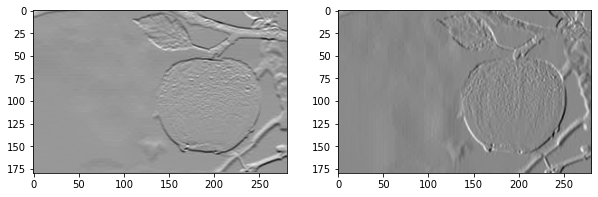

In [113]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(Ix, cmap='gray')
ax2.imshow(Iy, cmap='gray')

---
### 201 - Gradient Magnitude and Gradient Direction
---

In [116]:
Gm = (Ix**2 + Iy**2)**0.5
Gd = np.rad2deg(np.arctan2(Iy,Ix))
Gd.min(),Gd.max(),Gd.shape,Gm.min(),Gm.max()

(-180.0, 180.0, (180, 281), 0.0, 1125.6042566309256)

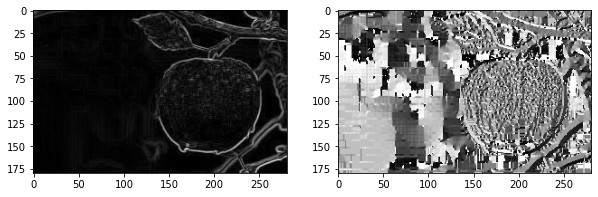

In [117]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(Gm, cmap='gray')
ax2.imshow(Gd, cmap='gray')

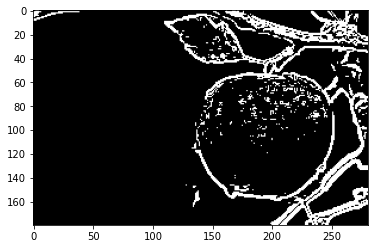

In [125]:
plt.imshow(Gm>170,cmap='gray')

---
### 206 - Gradient Direction Quantization Implementation
---

In [136]:
bins = np.array([-180.,-135.,-90.,-45.,0,45.,90.,135.,180.]) 
inds = np.digitize(Gd,bins)-1
Gd_bin1 = bins[inds.flatten()].reshape(Gd.shape)

In [137]:
i,j = 100,150
Gd[i,j],Gd_bin1[i,j]

(74.64260976491096, 45.0)

In [138]:
# In a better way
Gd_bin2 = 45*(np.round(Gd/45))
i,j = 100,150
Gd[i,j],Gd_bin2[i,j]

(74.64260976491096, 90.0)

---
### 208 - NMS implementation
---

In [139]:
# Non-Maxima Suppression
def NMS(Gm,Gd):
    Gd_binx = 45*(np.round(Gd/45))
    Gm_NMS = np.zeros(Gm.shape)
    numRows,numCols = Gm.shape[0],Gm.shape[1]
    a,b = 0.,0.
    for r in range(1,numRows-1):
        for c in range(1,numCols-1):
            ang = Gd_binx[r,c]
            if ang==180. or ang==-180. or ang==0. or ang==-0.0:
                a,b = Gm[r-1,c],Gm[r+1,c]
            elif ang==45. or ang==-135.0:
                a,b = Gm[r-1,c-1],Gm[r+1,c+1]
            elif ang==90. or ang==-90.:
                a,b = Gm[r,c-1],Gm[r,c+1]
            elif ang==135. or ang==-45.:
                a,b = Gm[r-1,c+1],Gm[r+1,c-1]
            else:
                print('Error')
                return
            if Gm[r,c]>=a and Gm[r,c]>=b:
                Gm_NMS[r,c] = Gm[r,c]
    return Gm_NMS

In [140]:
Gm_NMS = NMS(Gm,Gd)

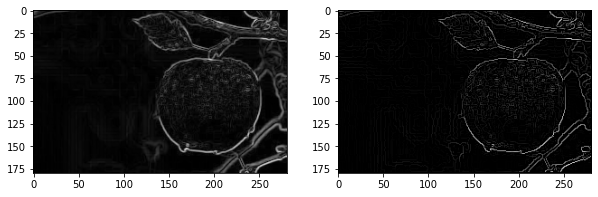

In [144]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(Gm, cmap='gray')
ax2.imshow(Gm_NMS, cmap='gray')

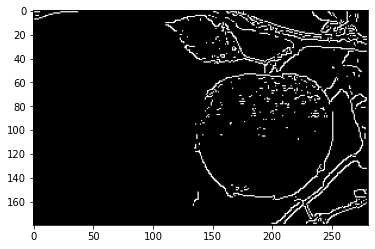

In [148]:
plt.imshow(Gm_NMS>200, cmap='gray')

---
### 215 - Hesterysis Thresholding Implementation
---

In [149]:
from skimage import filters

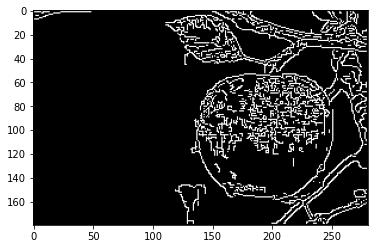

In [150]:
L = Gm_NMS.mean()
H = L + Gm_NMS.std()
E = filters.apply_hysteresis_threshold(Gm_NMS,L,H)
plt.imshow(E, cmap='gray')